<a href="https://colab.research.google.com/github/95ImadEL/Tensorflow-basics/blob/main/Lego_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [137]:
!ls brick_cnn

test  train


In [138]:
import os 

for dirpath, dirnames, filenames in os.walk('brick_cnn'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}") 

There are 2 directories and 0 images in brick_cnn
There are 3 directories and 0 images in brick_cnn/test
There are 1 directories and 5 images in brick_cnn/test/technic
There are 0 directories and 0 images in brick_cnn/test/technic/.ipynb_checkpoints
There are 1 directories and 5 images in brick_cnn/test/2x2_brick
There are 0 directories and 0 images in brick_cnn/test/2x2_brick/.ipynb_checkpoints
There are 0 directories and 0 images in brick_cnn/test/.ipynb_checkpoints
There are 3 directories and 0 images in brick_cnn/train
There are 1 directories and 15 images in brick_cnn/train/technic
There are 0 directories and 0 images in brick_cnn/train/technic/.ipynb_checkpoints
There are 1 directories and 15 images in brick_cnn/train/2x2_brick
There are 0 directories and 0 images in brick_cnn/train/2x2_brick/.ipynb_checkpoints
There are 0 directories and 0 images in brick_cnn/train/.ipynb_checkpoints


In [141]:
!ls brick_cnn/train/

2x2_brick  technic


In [175]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)

import pathlib
import numpy as np

data_dir = pathlib.Path("brick_cnn/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
class_names= ['2x2_brick', 'technic']

['.ipynb_checkpoints' '2x2_brick' 'technic']


In [176]:
# View an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (194, 259, 3)


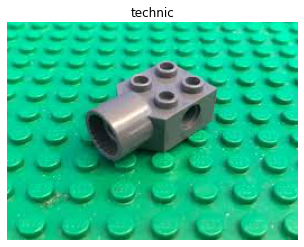

In [185]:
img = view_random_image("brick_cnn/train/", class_names[1])

In [186]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255,                                             
                                   rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                   horizontal_flip=True,
                                   vertical_flip=True
                                   )
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "brick_cnn/train/"
test_dir = "brick_cnn/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=1, # number of images to process at a time 
                                               target_size=(200, 200), # convert all images to be 200 x 200
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=1,
                                               target_size=(200, 200),
                                               class_mode="binary",
                                               seed=42)



Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


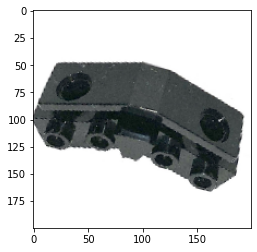

In [187]:
images, labels = train_data.next()
plt.imshow(images[0])

In [188]:
# Lets import learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [189]:
from tensorflow.keras import layers 

# Create a CNN model
model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (200 , 200, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data), callbacks=[lr_scheduler])

Epoch 1/40
30/30 [==============================] - 1s 27ms/step - loss: 0.8806 - accuracy: 0.3000 - val_loss: 0.7018 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 2/40
30/30 [==============================] - 1s 21ms/step - loss: 0.8038 - accuracy: 0.4667 - val_loss: 0.9522 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/40
30/30 [==============================] - 1s 21ms/step - loss: 0.7731 - accuracy: 0.4000 - val_loss: 0.6898 - val_accuracy: 0.6000 - lr: 1.2589e-04
Epoch 4/40
30/30 [==============================] - 1s 21ms/step - loss: 0.7739 - accuracy: 0.6000 - val_loss: 0.6121 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6791 - accuracy: 0.6000 - val_loss: 0.6827 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6848 - accuracy: 0.5000 - val_loss: 0.6428 - val_accuracy: 0.8000 - lr: 1.7783e-04
Epoch 7/40
30/30 [==============================] - 

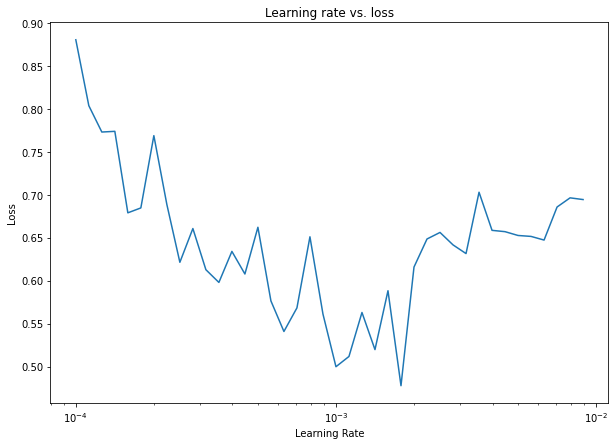

In [190]:
# Plot the learning rate versus the loss (to figure out where is the inflection point)
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [191]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

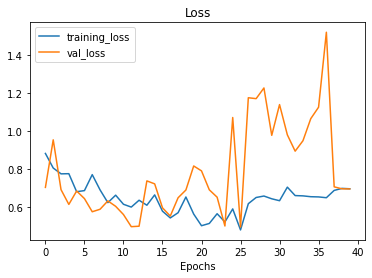

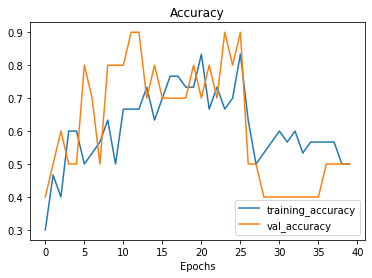

In [192]:
plot_loss_curves(history)

In [200]:
from tensorflow.keras import layers 

# Create a CNN model
model_2 = tf.keras.Sequential([
  layers.Conv2D(filters = 1 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (200 , 200, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 1 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=3.51e-4),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/100
30/30 [==============================] - 1s 29ms/step - loss: 0.7296 - accuracy: 0.3667 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 2/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6666 - accuracy: 0.4667 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 0.6433 - accuracy: 0.4667 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/100
30/30 [==============================] - 1s 21ms/step - loss: 0.6442 - accuracy: 0.4667 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 5/100
30/30 [==============================] - 1s 25ms/step - loss: 0.6337 - accuracy: 0.5667 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 0.6424 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 7/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6233 - accuracy: 0.5333 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 

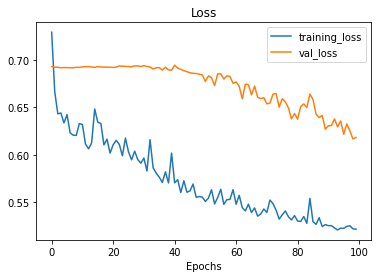

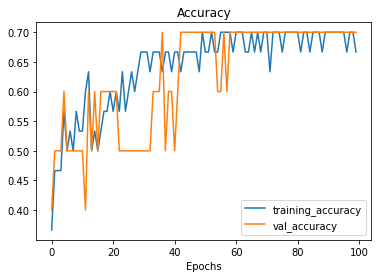

In [201]:
plot_loss_curves(history_2)

In [195]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=200):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

1/1 [==============================] - 0s 53ms/step


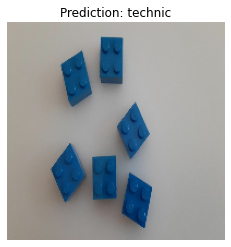

In [202]:
# Test our model on a custom image
pred_and_plot(model_2, "1.jpg", class_names)

1/1 [==============================] - 0s 17ms/step


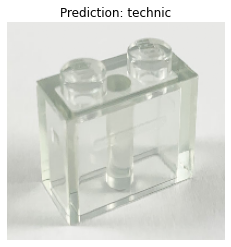

In [203]:
# Test our model on a custom image
pred_and_plot(model_2, "2.png", class_names)